# Simulate the Synchronisation of fireflies 
In South East Asia a spectacular phenomen occurs during night. Thousands of fireflies start flashing in rhythmically in synchronisation (see https://www.youtube.com/watch?v=ZGvtnE1Wy6U). This programm simulates this synchronisation based on the Kuramoto model. 

## Theory

Each firefly $i$ has an inner clock, described by the phase $\theta \in [0, 2\pi)$),
and a natural angular frequency $\omega_i = 2\pi f_i$ , with $f_i$ being the frequency of
the flashes. Both $\theta_i$ and $f_i$ are selected from a uniform distribution, with
$\theta_i \in U(0, 2\pi)$ and $f_i \in U(\bar{f} \pm \Delta f, \bar{f} \pm \Delta f)$, where $\bar{f}$ the average
flashing frequency and $\Delta f$ controls the width of the frequency distribution. To determine whether or not a specific firefly has its light on, a threshold parameter is defined $C \in [0, 1)$ as

$C = \sin  (\frac{1}{2}\pi − \omega T_{flash} )$

with $T_{flash}$  the flash duration, which we assume to be equal for all flies. One now assumes that
 that the light of firefly i is on when $\sin(\theta_i ) > C$.
 
To determine whether or not two fireflies $i$ and $j$ are interacting, three conditions are imposed. First of all, the fireflies need to be in visual range of each other, that is, the distance between them is smaller than the visual radius $R$ of the flies. Secondly, the light of firefly $i$ must be off, while thirdly,
firefly $j$ must have its light on. The phase change of $θ_i$ due to interaction between fireflies $i$ and $j$ then leads to a phase adjustment by firefly $i$ according
to

$(\frac{d\theta_i}{dt})_j = K \sin(\theta_j − \theta_i )$.

where $K$ is again the coupling strength.

To quantify the syncronisation first a centroid is introduced:

$r(t) = \frac{1}{N} \sum_{j=0}^N e^{i\theta_j(t)}$

where $i$ is this time the imaginary unit.
Then, the order parameter is:

$\bar{r} = \lim\limits_{T \to \infty} \int_{T_0}^{T_0 + T} |r(t)| dt$

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from fireflies_classes import experiment, r_mean
from IPython.display import HTML

## Create an experiment instance
The follwoing parameters are used:

parameter | type      | description                | unit 
----------|-----------|----------------------------|---------------
duration  | `float`   | duration of the experiment | s
numff     | `int`     | number of fireflies        | 
f         | `float`   | flash frequency            | 1/s
Delta_f   | `float`   | half the width of a uniform distribuation around the flash frequency|  1/s
T_flash   | `float`   | Flash Duration | s
r_int     | `float`   | radius of interact | m
K         | `float`   | coupling strength  | 1/s
move      | `boolean` | incorporate movig of the fireflies | 
maxvel    | `float`   | maximum velocity | m/s

In [6]:
# experiment parameters
duration = 15.       
numff    = 35        

# firefly  parameters
f    =  0.25    
Delta_f = 0.01   
T_flash   =  0.2      
r_int    = 0.5        
K = 0.8        
move = True         
maxvel  = 0.08      

np.random.seed(0)
exp = experiment(duration,
                 numff,
                 f,
                 Delta_f,
                 T_flash,r_int,
                 K,
                 move,
                 maxvel)

# Run the model
The model is integrated with the instance method `exp.run`. If full synchonisation is reached (all fireflies flash together) the integreation is interrupted.

Time:0.0s, Sync:0.0%
Time:13.3333333333s, Sync:57.14285714285714%


(0, 1)

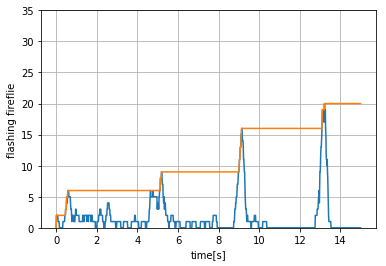

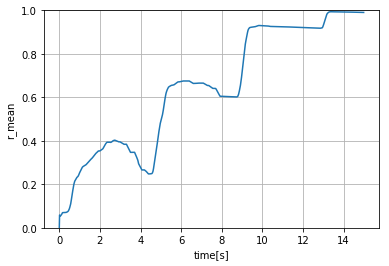

In [7]:
# Run the model
exp.run()

# Plot some results
timeArray = np.arange(exp.iters)*exp.dt
plt.figure(1)           
plt.plot(timeArray,exp.flash_counter)
plt.plot(timeArray,exp.max_sim_flashs)
plt.xlabel("time[s]")
plt.ylabel("flashing fireflie")
plt.ylim(0,exp.number_fireflies)
plt.grid()

plt.figure(2)           
plt.plot(timeArray,exp.r_t)
plt.xlabel("time[s]")
plt.ylabel("r_mean")
plt.grid()
plt.ylim(0,1)

# Animated results
To animate the results a new experiment instance has to be generated since most of the data for each time step.

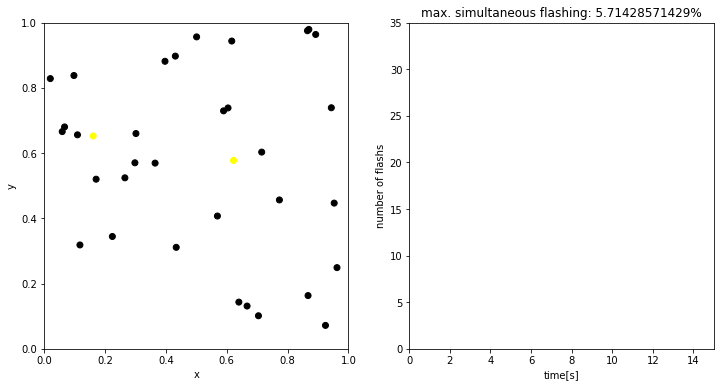

In [8]:
np.random.seed(0)
exp = experiment(duration,
                 numff,
                 f,
                 Delta_f,
                 T_flash,r_int,
                 K,
                 move,
                 maxvel)


fig, ax = plt.subplots(1,2,figsize=(12,6))

# firefly plot 
x, y = [],[]
sc = ax[0].scatter(x,y)
sc.set_cmap("viridis")
ax[0].set_xlabel("x")
ax[0].set_ylabel("y")
ax[0].set_xlim(0,1)
ax[0].set_ylim(0,1)

# flash counter
ax[1].set_xlabel("time[s]")
ax[1].set_ylabel("number of flashs")
line, = ax[1].plot([],[])
ax[1].set_xlim(0,duration)
ax[1].set_ylim(0,numff)

nflashs = []

def animate(frameNum):
    """ update function for the animation"""    

    exp.time_stepper()
    
    x = [exp.firefly_list[i].x for i in range(exp.number_fireflies)]
    y = [exp.firefly_list[i].y for i in range(exp.number_fireflies)]
    c = [exp.firefly_list[i].flash for i in range(exp.number_fireflies)]
    c = ["yellow" if flash==1. else 'k' for flash in c]
    
    sc.set_offsets(np.c_[x,y])
    sc.set_facecolors(c)
    
    nflashs.append(exp.count_flashs())
    
    time = np.linspace(0.,len(nflashs)*exp.dt,len(nflashs))
    
    line.set_data(time,nflashs)
    ax[1].set_title("max. simultaneous flashing: "+str((max(nflashs)/exp.number_fireflies*100.)) + "%")

ani = animation.FuncAnimation(fig, animate, 
                frames=exp.iters, interval=10, repeat=False) 


In [9]:
# the animation can take some time
HTML(ani.to_html5_video())